In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.notebook_repr_html", False)  # disable "rich" output
plt.style.use("seaborn")

In [3]:
trees = pd.read_csv("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/urban_forest_subset2.csv",
    comment="#")
trees = trees.rename({
    "Common Name": "Species",
    "Diameter Breast Height": "Diameter",
    "Year Planted": "Year",
    "Located In": "Location",
    "Age Description": "Age",
}, axis=1).loc[:, ["Species", "Location", "Age", "Diameter", "Year"]]
trees.head()

             Species Location          Age  Diameter  Year
0       London Plane   Street     Juvenile        16  2009
1   Japanese Zelkova   Street  Semi-Mature        12  2008
2  Lemon Scented Gum   Street     Juvenile         8  2009
3   Japanese Zelkova   Street  Semi-Mature        20  2008
4   Japanese Zelkova   Street  Semi-Mature        18  2006

In [4]:
trees.loc[:,"Species"].describe()

count              100
unique               4
top       London Plane
freq                33
Name: Species, dtype: object

In [5]:
trees.loc[:,"Species"].value_counts()

London Plane         33
Japanese Zelkova     28
Lemon Scented Gum    25
Peppercorn Tree      14
Name: Species, dtype: int64

In [6]:
trees.loc[:,"Age"].value_counts()

Semi-Mature    50
Juvenile       28
New            17
Mature          5
Name: Age, dtype: int64

In [8]:
trees.loc[:,"Diameter"].describe()

count    100.000000
mean      17.400000
std       16.877455
min        1.000000
25%        7.750000
50%       14.000000
75%       21.000000
max      114.000000
Name: Diameter, dtype: float64

In [9]:
trees.loc[:,"Year"].describe()

count     100.0000
mean     2007.7400
std         1.4538
min      2005.0000
25%      2006.0000
50%      2008.0000
75%      2009.0000
max      2010.0000
Name: Year, dtype: float64

In [12]:
trees.groupby("Location").mean()

           Diameter         Year
Location                        
Park      22.629630  2008.185185
Street    15.465753  2007.575342

In [16]:
trees.groupby("Location")["Diameter"].mean()

Location
Park      22.629630
Street    15.465753
Name: Diameter, dtype: float64

In [17]:
trees.groupby("Location").mean().reset_index()

  Location   Diameter         Year
0     Park  22.629630  2008.185185
1   Street  15.465753  2007.575342

In [19]:
trees.groupby(["Species","Location"]).mean()

                             Diameter         Year
Species           Location                        
Japanese Zelkova  Park      19.500000  2009.000000
                  Street    10.576923  2007.615385
Lemon Scented Gum Park       8.818182  2008.909091
                  Street    10.357143  2007.571429
London Plane      Park      44.000000  2006.000000
                  Street    19.133333  2007.500000
Peppercorn Tree   Park      31.181818  2007.909091
                  Street    45.000000  2008.000000

In [22]:
trees.groupby(["Location","Diameter"]).mean()

                          Year
Location Diameter             
Park     2         2009.500000
         3         2010.000000
         4         2009.750000
         5         2008.000000
         8         2008.000000
         13        2009.000000
         14        2008.000000
         17        2009.000000
         18        2006.000000
         19        2006.000000
         21        2009.000000
         22        2006.000000
         23        2006.000000
         24        2006.000000
         29        2008.000000
         32        2009.000000
         35        2009.000000
         38        2008.000000
         40        2008.000000
         91        2006.000000
         114       2008.000000
Street   1         2010.000000
         2         2010.000000
         3         2009.500000
         4         2007.500000
         6         2008.000000
         7         2007.000000
         8         2007.666667
         9         2005.666667
         10        2009.000000
        

In [23]:
trees.groupby(["Species","Location"]).size()

Species            Location
Japanese Zelkova   Park         2
                   Street      26
Lemon Scented Gum  Park        11
                   Street      14
London Plane       Park         3
                   Street      30
Peppercorn Tree    Park        11
                   Street       3
dtype: int64

In [24]:
trees.groupby(["Species","Location"]).size().rename("count").reset_index()

             Species Location  count
0   Japanese Zelkova     Park      2
1   Japanese Zelkova   Street     26
2  Lemon Scented Gum     Park     11
3  Lemon Scented Gum   Street     14
4       London Plane     Park      3
5       London Plane   Street     30
6    Peppercorn Tree     Park     11
7    Peppercorn Tree   Street      3

In [29]:
trees.groupby("Location")["Diameter"].size().describe().reset_index()

   index   Diameter
0  count   2.000000
1   mean  50.000000
2    std  32.526912
3    min  27.000000
4    25%  38.500000
5    50%  50.000000
6    75%  61.500000
7    max  73.000000

In [30]:
trees.groupby("Location")["Diameter"].aggregate([np.mean, np.median]).reset_index()

  Location       mean  median
0     Park  22.629630    18.0
1   Street  15.465753    13.0

In [31]:
def standardise(x):
    return(x-np.mean(x))/np.std(x,ddof=1)
trees.groupby("Species")["Diameter"].transform(standardise)

0    -0.325790
1     0.101961
2    -0.259546
3     1.140111
4     0.880574
        ...   
95   -0.417114
96    2.935770
97   -1.065958
98    1.010343
99    0.225660
Name: Diameter, Length: 100, dtype: float64

In [32]:
trees["Diameter_Std"]=trees.groupby("Species")["Diameter"].transform(standardise)

In [33]:
trees

              Species Location          Age  Diameter  Year  Diameter_Std
0        London Plane   Street     Juvenile        16  2009     -0.325790
1    Japanese Zelkova   Street  Semi-Mature        12  2008      0.101961
2   Lemon Scented Gum   Street     Juvenile         8  2009     -0.259546
3    Japanese Zelkova   Street  Semi-Mature        20  2008      1.140111
4    Japanese Zelkova   Street  Semi-Mature        18  2006      0.880574
..                ...      ...          ...       ...   ...           ...
95   Japanese Zelkova   Street     Juvenile         8  2006     -0.417114
96       London Plane   Street       Mature        70  2008      2.935770
97   Japanese Zelkova   Street     Juvenile         3  2009     -1.065958
98   Japanese Zelkova   Street  Semi-Mature        19  2008      1.010343
99    Peppercorn Tree     Park  Semi-Mature        40  2008      0.225660

[100 rows x 6 columns]

In [34]:
trees.groupby("Species")["Diameter_Std"].aggregate([np.mean,np.std])

                           mean       std
Species                                  
Japanese Zelkova   9.516197e-17  1.018350
Lemon Scented Gum  3.663736e-17  1.020621
London Plane      -2.691450e-17  1.015505
Peppercorn Tree   -1.110223e-16  1.037749

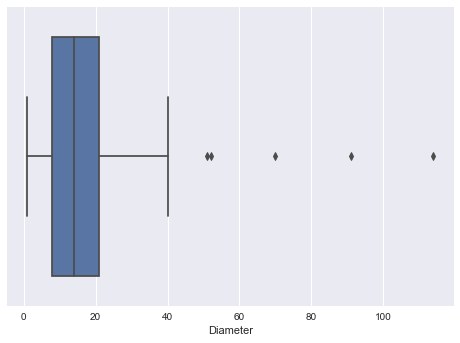

In [36]:
sns.boxplot(x="Diameter",data=trees)
plt.show()

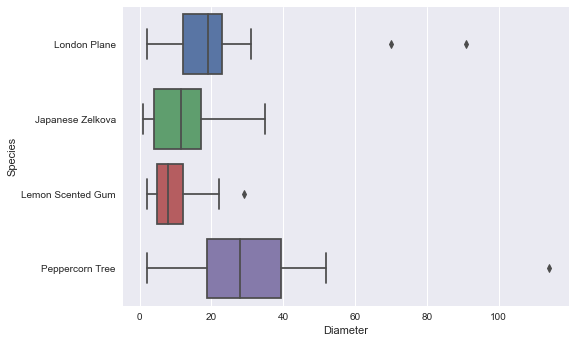

In [37]:
sns.boxplot(x="Diameter", y = "Species",data=trees)
plt.show()

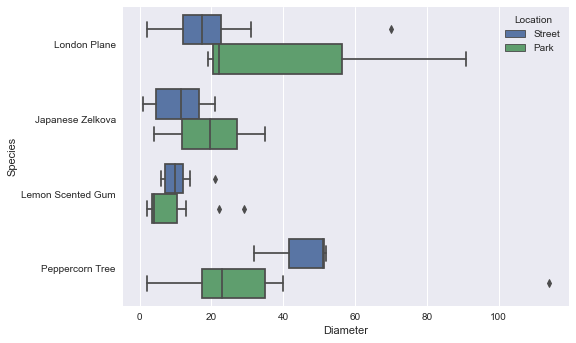

In [38]:
sns.boxplot(x="Diameter", y = "Species", hue= "Location",data=trees)
plt.show()

In [39]:
trees.groupby(["Species", "Location"]).size().rename("Counts").reset_index()

             Species Location  Counts
0   Japanese Zelkova     Park       2
1   Japanese Zelkova   Street      26
2  Lemon Scented Gum     Park      11
3  Lemon Scented Gum   Street      14
4       London Plane     Park       3
5       London Plane   Street      30
6    Peppercorn Tree     Park      11
7    Peppercorn Tree   Street       3

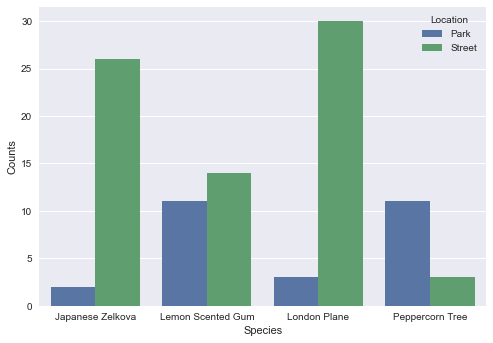

In [41]:
sns.barplot(
    x= "Species",
    y= "Counts",
    hue= "Location",
    data = trees.groupby(["Species", "Location"]).size().rename("Counts").reset_index()
)
plt.show()